# Benchmark: Compare line-sink with row of wells

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

plt.rcParams["font.size"] = 8.0

In [2]:
ml = ttim.ModelMaq(tmin=0.01, tmax=10)
ls1 = ttim.LineSink(ml, -1, 0, 1, 0, tsandQ=[(0, 10)])
ml.solve()

self.neq  0
No unknowns. Solution complete


In [3]:
ml2 = ttim.ModelMaq(tmin=0.01, tmax=10)
x = np.arange(-0.9, 1, 0.2)
nwells = len(x)
Qtot = 10
for i in range(nwells):
    ttim.Well(ml2, x[i], 0, tsandQ=[(0, Qtot / nwells)])
ml2.solve()

self.neq  10
solution complete


In [4]:
t = np.logspace(-2, 1, 100)
h1a = ml.head(0.5, 1, t)
h1b = ml.head(0.5, 10, t)
h2a = ml2.head(0.5, 1, t)
h2b = ml2.head(0.5, 10, t)

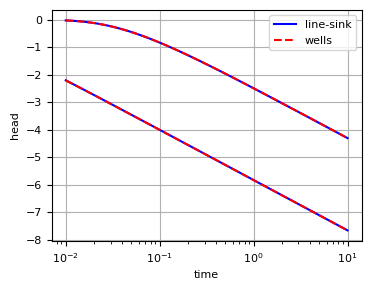

In [5]:
plt.figure(figsize=(4, 3))
plt.semilogx(t, h1a[0], "b", label="line-sink")
plt.semilogx(t, h2a[0], "r--", label="wells")
plt.semilogx(t, h1b[0], "b")
plt.semilogx(t, h2b[0], "r--")
plt.xlabel("time")
plt.ylabel("head")
plt.legend()
plt.grid()

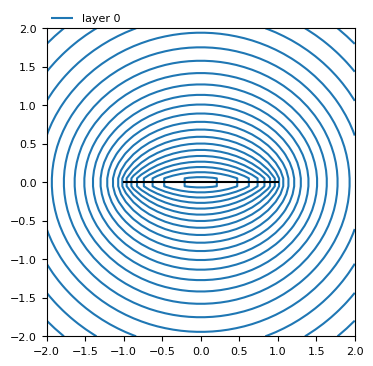

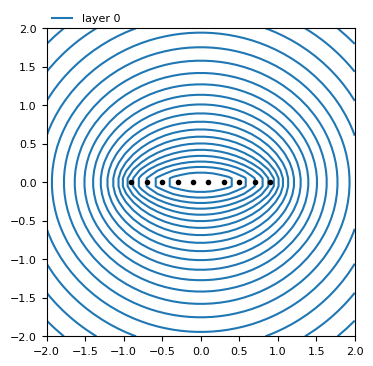

In [6]:
ml.plots.contour([-2, 2, -2, 2], [40, 40], t=5, figsize=(4, 4), labels=False)
ml2.plots.contour([-2, 2, -2, 2], [40, 40], t=5, figsize=(4, 4), labels=False);

In [7]:
xg1 = np.linspace(-2, 2, 100)
ygtop = np.linspace(1e-6, 2, 50)
ygbot = np.linspace(-2, -1e-6, 50)
htop = ml.headgrid(xg1, ygtop, t=5)
hbot = ml2.headgrid(xg1, ygbot, t=5)
print(f"min and max head: {np.min(htop)}, {np.max(htop)}")

min and max head: -9.012846783998464, -5.765937860023954


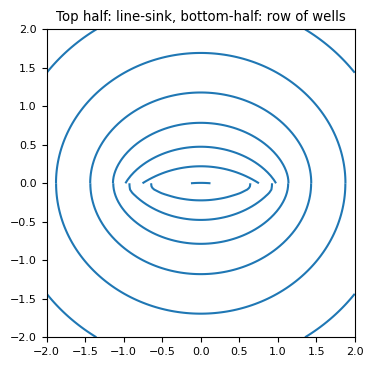

In [8]:
plt.figure(figsize=(4, 4))
plt.subplot(aspect=1)
plt.contour(xg1, ygtop, htop[0, 0], np.arange(-10, 0, 0.5), colors="C0", linestyles="-")
plt.contour(xg1, ygbot, hbot[0, 0], np.arange(-10, 0, 0.5), colors="C0", linestyles="-")
plt.title("Top half: line-sink, bottom-half: row of wells");